Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')
options(repr.plot.res = 300, repr.plot.width = 7, repr.plot.height = 4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [7]:
Avengers = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  Appearances = col_double(),
  Year = col_double(),
  `Years since joining` = col_double()
)
ℹ Use `spec()` for the full column specifications.




Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [ ]:
penguins %>%  arrange(body_mass_g) %>% group_by(species) %>% mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))

In [8]:
Avengers %>% head

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered
http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Death: ""Later while under the influence of Immortus Stark committed a number of horrible acts and was killed.' This set up young Tony. Franklin Richards later brought him back"
http://marvel.wikia.com/Robert_Bruce_Banner_(Earth-616),Robert Bruce Banner,2089,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Dies in Ghosts of the Future arc. However ""he had actually used a hidden Pantheon base to survive"""
http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,YES,NO,NA,NA,NA,NA,NA,NA,Dies in Fear Itself brought back because that's kind of the whole point. Second death in Time Runs Out has not yet returned
http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,NA,Sep-63,1963,52,Honorary,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [34]:
ecdf = Avengers %>%
     arrange(Appearances) %>%
                mutate(rn = row_number(), fraction_of_appearance =  rn/max(rn)) %>%
    select(Appearances, fraction_of_appearance, rn) 


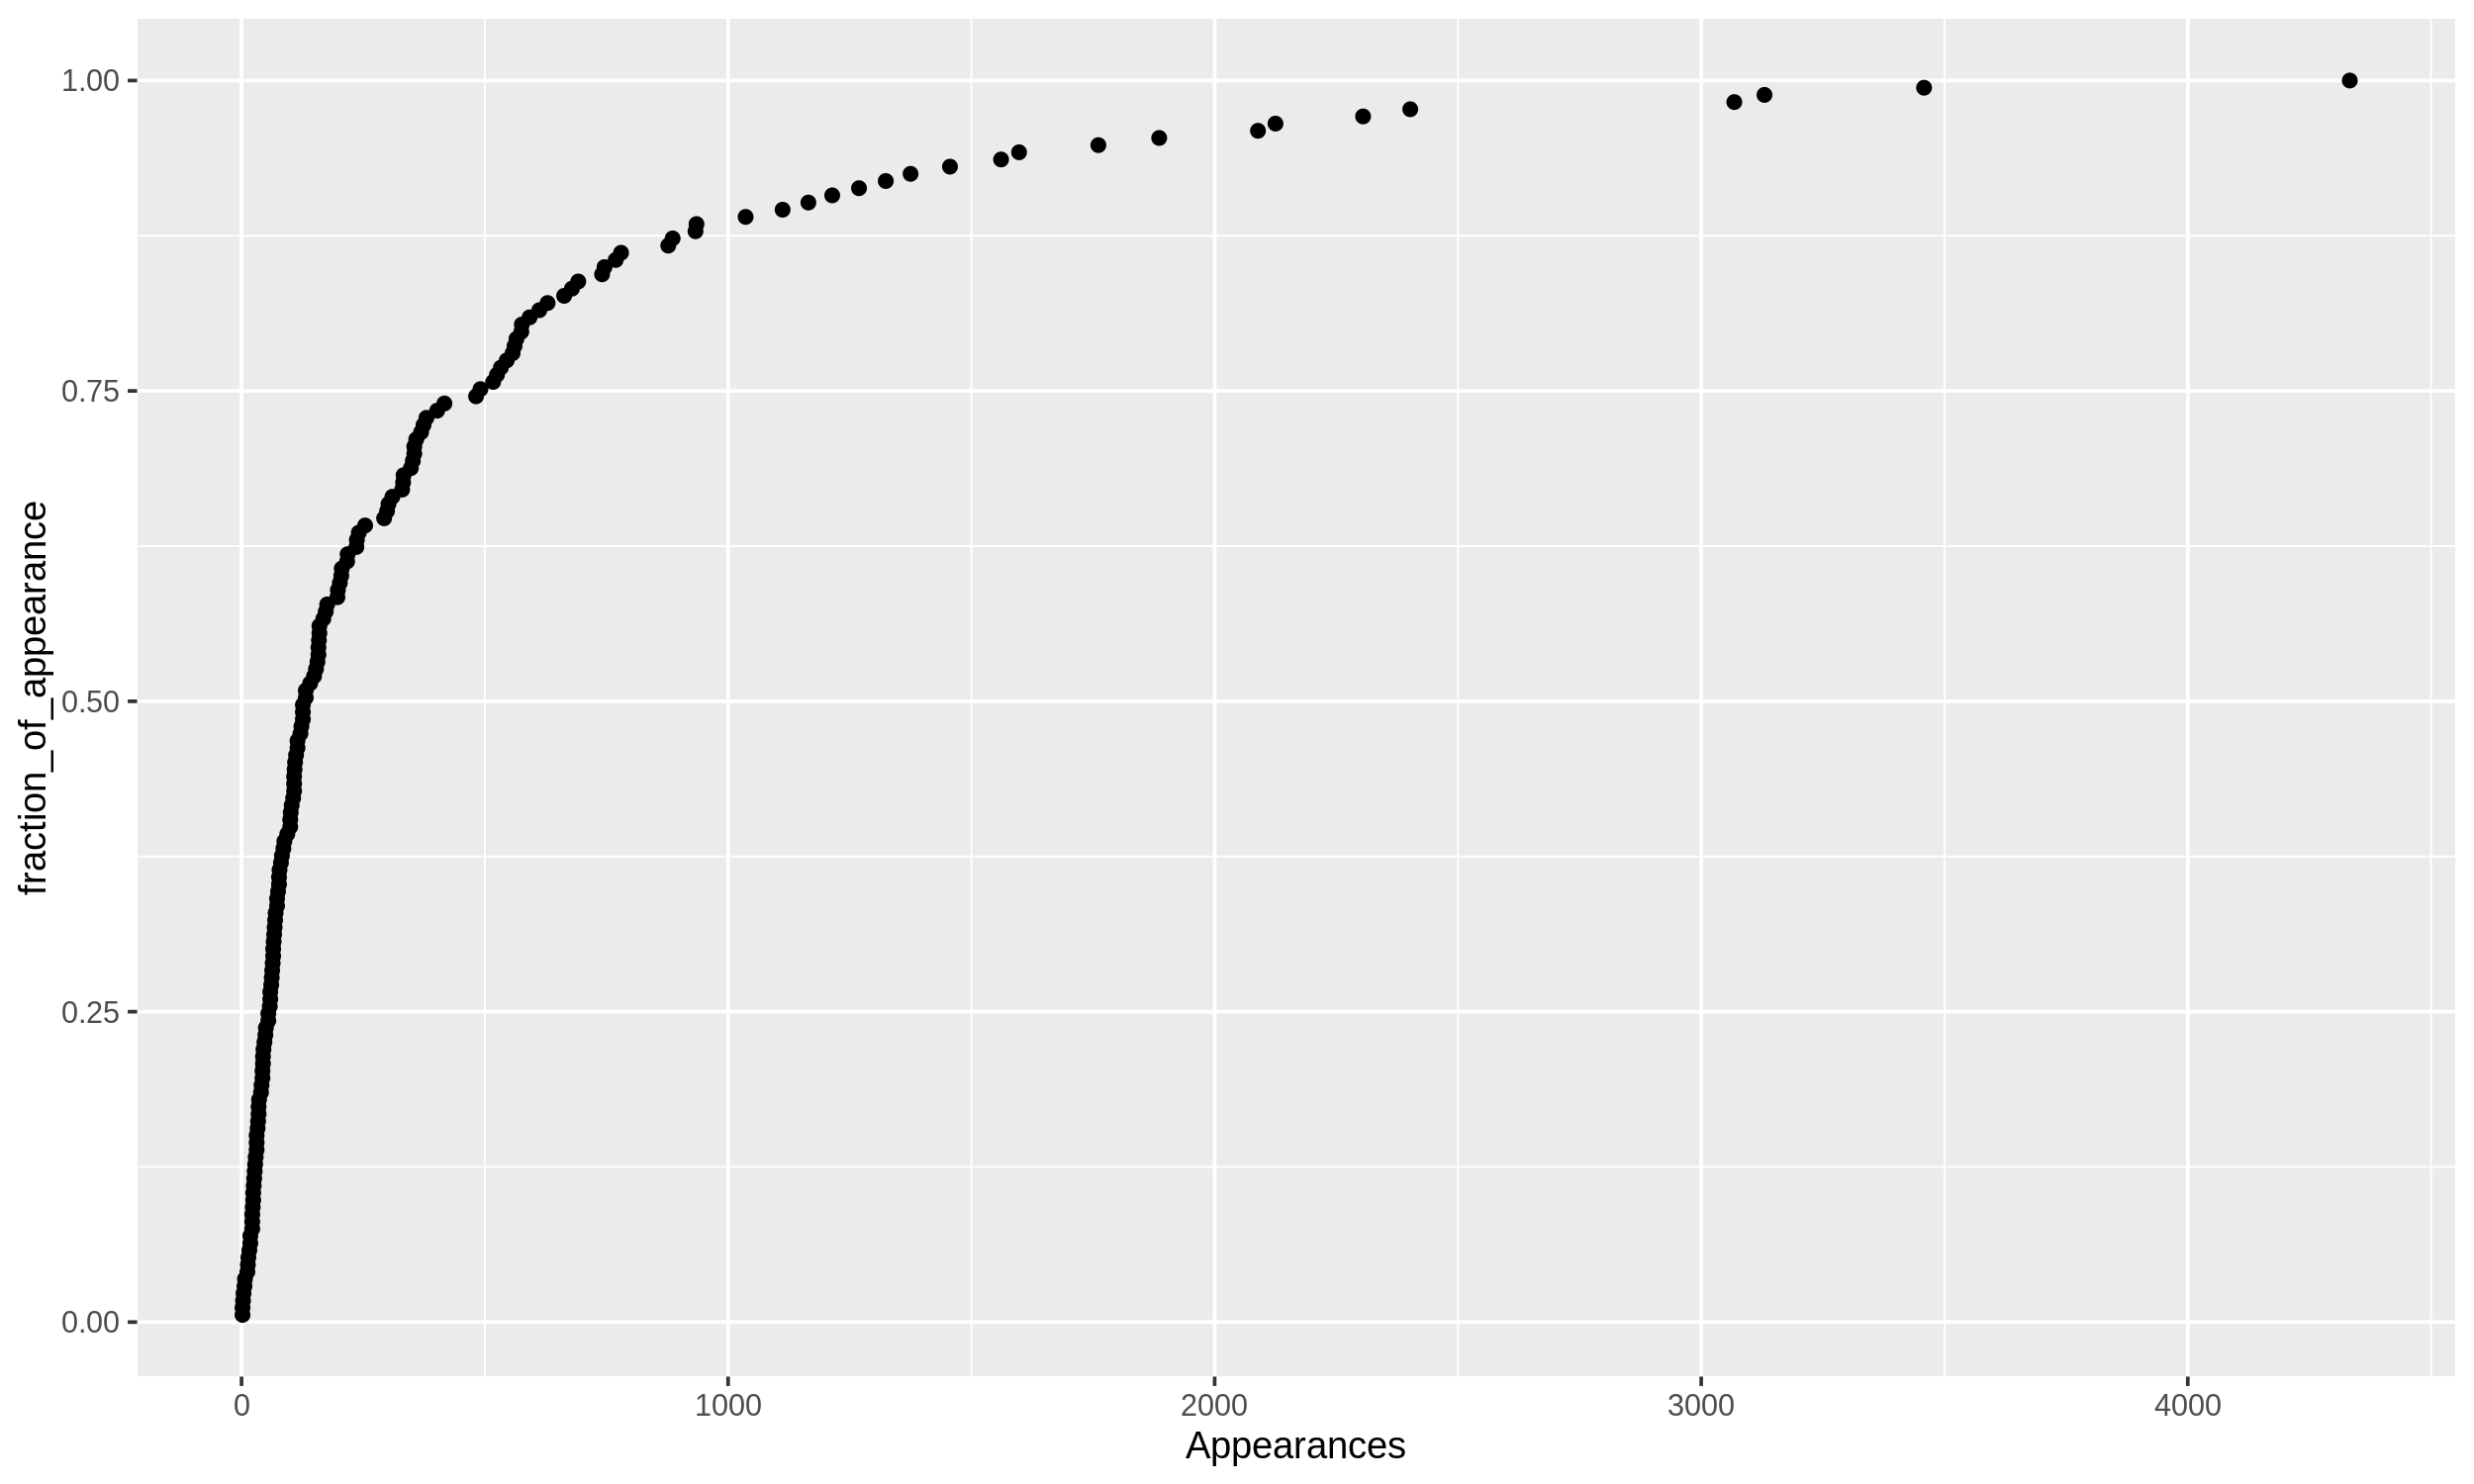

In [35]:
options(repr.plot.height = 6, repr.plot.width = 10, repr.plot.res = 250)


p = ggplot(ecdf, aes(x = Appearances, y = fraction_of_appearance))

# p = p + geom_line()

p = p + geom_point()

p

# p = p + scale_color_brewer(type = "qual", palette = "Set2")

# p = p + theme_minimal()

# p = p + labs(x = 'Number of Appearnaces', y = 'Percent of Appearances') # I want to set color = 'Species' but it creates two..

# p = p + scale_x_continuous(labels = comma)

# p

In [ ]:
# He asked us how we could look at the top 4 values
# Use slice max, filter or arrange

In [38]:
#This was another way to arrange the frac_appearances
Avengers %>%
        select(Appearances, `Name/Alias`) %>%
            mutate(frac_appearances = rank(Appearances)/n()) %>%
        head

Appearances,Name/Alias,frac_appearances
<dbl>,<chr>,<dbl>
1269,"Henry Jonathan ""Hank"" Pym",0.9132948
1165,Janet van Dyne,0.9017341
3068,"Anthony Edward ""Tony"" Stark",0.9826590
2089,Robert Bruce Banner,0.9595376
2402,Thor Odinson,0.9768786
612,Richard Milhouse Jones,0.8150289
